# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [37]:
X_train = pd.read_csv('X_train_df.csv')
X_test = pd.read_csv('X_test_df.csv')
y_train = pd.read_csv('./train/y_train.txt', header=None)
y_test = pd.read_csv('./test/y_test.txt', header=None)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=19)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [59]:
clf = DecisionTreeClassifier(random_state=19, max_depth=4).fit(X_train, y_train)
lista = clf.feature_importances_
result = np.where(lista > 0)
lista[result]

array([0.28252324, 0.01296172, 0.12372268, 0.00468   , 0.01700756,
       0.14277127, 0.25132618, 0.16500735])

In [58]:
result

(array([ 53,  58,  75, 133, 160, 215, 227, 560], dtype=int64),)

In [83]:
features = pd.read_csv('features.txt', sep = ' ', header = None)

features.loc[features[0] == 559]

,0,1
558,559,"angle(X,gravityMean)"


In [84]:
features.loc[features[0] == 226]

,0,1
225,226,tGravityAccMag-arCoeff()4


In [85]:
features.loc[features[0] == 52]

,0,1
51,52,tGravityAcc-max()-Z


In [86]:
melhores = ['angle(X,gravityMean)', 'tGravityAccMag-arCoeff()4', 'tGravityAcc-max()-Z']

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [96]:
%%time
X_valid = X_valid[melhores]
X_train = X_train[melhores]

caminho = DecisionTreeClassifier(random_state=19, max_depth=4).cost_complexity_pruning_path(X_valid, y_valid)
ccp_alphas = caminho.ccp_alphas

Wall time: 9.03 ms


In [97]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=19, ccp_alpha=ccp_alpha).fit(X_valid, y_valid)
    clfs.append(clf)

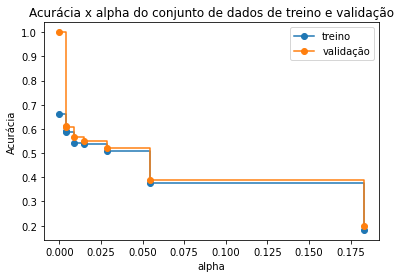

In [102]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid, y_valid) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [103]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 100.00


DecisionTreeClassifier(random_state=19)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 47.10


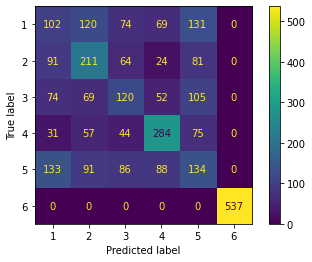

In [104]:
X_test = X_test[melhores]

acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test, y_test);